# Exercitiul 1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az
from pandas import DataFrame

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [16]:
def standardize_data(X, mean = None, std = None):
    x_mean, x_std = mean, std
    if mean is None:
        x_mean = X.mean()
    if std is None:
        x_std = X.std()
    x_s = (X - x_mean) / x_std
    return x_s, x_mean, x_std

In [2]:
df = pd.read_csv('date_alegeri_turul2.csv')
df.head()

,Varsta,Sex,Educatie,Venit,Vot
0,45,1,0,8.06,1
1,39,1,1,6.48,1
2,46,1,1,5.48,1
3,55,0,0,5.61,1
4,38,1,1,5.86,1


In [26]:
cols = df.columns[:4]
x = []
for col in cols:
    x_curr = df[col].values.astype(float)
    x_s, x_mean, x_std = standardize_data(x_curr)
    x.append(x_s)
x = np.array(x).T

y = df['Vot'].values.astype(float)
y

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [28]:
with pm.Model() as regression_model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=len(cols))
    mu = alpha + pm.math.dot(x, beta)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    
    yl = pm.Bernoulli('yl', p=theta, observed=y)
    
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [30]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.738,0.149,1.459,2.012,0.003,0.002,3076.0,3183.0,1.0
beta[0],0.290,0.131,0.035,0.531,0.002,0.001,5359.0,3329.0,1.0
beta[1],-0.423,0.129,-0.651,-0.171,0.002,0.001,4263.0,3294.0,1.0
beta[2],0.486,0.130,0.251,0.738,0.002,0.001,4526.0,3338.0,1.0
beta[3],1.009,0.145,0.736,1.279,0.002,0.002,3606.0,3183.0,1.0
...,...,...,...,...,...,...,...,...,...
theta[495],0.980,0.007,0.967,0.993,0.000,0.000,2590.0,2659.0,1.0
theta[496],0.680,0.054,0.583,0.779,0.001,0.001,5643.0,3619.0,1.0
theta[497],0.886,0.021,0.846,0.925,0.000,0.000,3149.0,3010.0,1.0
theta[498],0.877,0.031,0.817,0.931,0.000,0.000,4176.0,3244.0,1.0


Observam ca urmatorii coeficienti au cea mai mare influenta, acestia fiind cei pentru Educatie si Venit

Cream acum un model cu acestia

In [37]:
with pm.Model() as regression_model_2:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    mu = alpha + pm.math.dot(x[:,2:], beta)
    
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    bd = pm.Deterministic('bd', -alpha / beta[1] - beta[0] / beta[1] * x[:,2].flatten())
    
    yl = pm.Bernoulli('yl', p=theta, observed=y)
    
    trace_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


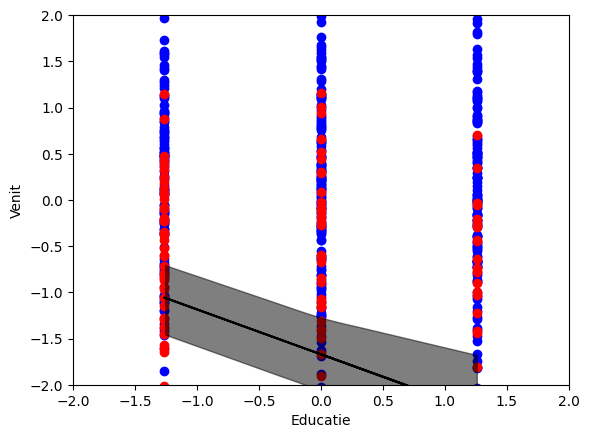

In [38]:
idx = np.argsort(y)
bd = trace_2.posterior['bd'].mean(("chain", "draw"))[idx]

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.scatter(x[:,2][y == 1], x[:,3][y == 1], color='blue')
plt.scatter(x[:,2][y == 0], x[:,3][y == 0], color='red')

plt.plot(x[:,2][idx], bd, color='k')
az.plot_hdi(x[:,2], trace_2.posterior['bd'], color='k')

plt.xlabel('Educatie')
plt.ylabel('Venit')

plt.show()